In [ ]:
import tensorflow as tf
from PIL import UnidentifiedImageError
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/train"

In [ ]:
images=[]
masks=[]

In [ ]:
len(masks)

0

In [ ]:
from keras.utils.image_utils import load_img
from keras.utils.image_utils import img_to_array
import os
cnt=0
for file in os.listdir(path):
  if "mask" not in file:
    try:
      img1=load_img(path+"/"+file,target_size=(128,128))
      #print(path+"/"+file)
      mask1=load_img(path+"/"+file[:-4]+"_mask.png",target_size=(128,128))
      images.append(img_to_array(img1))
      try:
        array=img_to_array(mask1)[:,:,0]
        masks.append(to_categorical(array,num_classes=2, dtype='uint8'))
        #print(img_to_array(mask1)[:,:,0])
      except IndexError:
        cnt+=1
    except UnidentifiedImageError:
      print(file)
print(cnt)

0


In [ ]:
#for file in os.listdir(path):
#  print(file[:-4])

In [ ]:
len(images)

1482

In [ ]:
len(masks)

1482

In [ ]:
#i=0
#for file in os.listdir(path):
#  i+=1
#print(i)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
images=np.array(images,dtype="float32")/255.0
masks=np.array(masks,dtype="float32")

In [ ]:
split = train_test_split(images,masks,
                         test_size=0.20,
                         random_state=42)

In [ ]:
len(split)

4

In [ ]:
(trainImages, testImages) = split[:2]
(trainmasks, testmasks) = split[2:4]

In [ ]:
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

import tensorflow as tf

In [ ]:
inputs = Input((128,128,3))

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (inputs)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(2, (1, 1), activation='softmax') (c9)

model = Model(inputs=[inputs], outputs=[outputs])

model.compile(optimizer='adam', loss='categorical_crossentropy')

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
filepath = "model_Save"
earlystopper = EarlyStopping(patience=5, verbose=1)
checkpoint = ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True,mode='min')
callbacks_list = [checkpoint]
import numpy as np
history = model.fit(trainImages,trainmasks,validation_split=0.1,batch_size=16,epochs=25,callbacks=callbacks_list)

Epoch 1/25
67/67 [==============================] - ETA: 0s - loss: 0.1435
Epoch 1: val_loss improved from inf to 0.10522, saving model to model_Save


67/67 [==============================] - 35s 196ms/step - loss: 0.1435 - val_loss: 0.1052
Epoch 2/25
66/67 [============================>.] - ETA: 0s - loss: 0.0884
Epoch 2: val_loss improved from 0.10522 to 0.08361, saving model to model_Save


67/67 [==============================] - 11s 172ms/step - loss: 0.0883 - val_loss: 0.0836
Epoch 3/25
66/67 [============================>.] - ETA: 0s - loss: 0.0723
Epoch 3: val_loss improved from 0.08361 to 0.07569, saving model to model_Save


67/67 [==============================] - 11s 172ms/step - loss: 0.0724 - val_loss: 0.0757
Epoch 4/25
66/67 [============================>.] - ETA: 0s - loss: 0.0641
Epoch 4: val_loss improved from 0.07569 to 0.05648, saving model to model_Save


67/67 [==============================] - 12s 187ms/step - loss: 0.0641 - val_loss: 0.0565
Epoch 5/25
66/67 [============================>.] - ETA: 0s - loss: 0.0553
Epoch 5: val_loss improved from 0.05648 to 0.04936, saving model to model_Save


67/67 [==============================] - 11s 164ms/step - loss: 0.0553 - val_loss: 0.0494
Epoch 6/25
66/67 [============================>.] - ETA: 0s - loss: 0.0484
Epoch 6: val_loss improved from 0.04936 to 0.04470, saving model to model_Save


67/67 [==============================] - 11s 165ms/step - loss: 0.0484 - val_loss: 0.0447
Epoch 7/25
66/67 [============================>.] - ETA: 0s - loss: 0.0445
Epoch 7: val_loss improved from 0.04470 to 0.04314, saving model to model_Save


67/67 [==============================] - 11s 171ms/step - loss: 0.0446 - val_loss: 0.0431
Epoch 8/25
66/67 [============================>.] - ETA: 0s - loss: 0.0395
Epoch 8: val_loss improved from 0.04314 to 0.03725, saving model to model_Save


67/67 [==============================] - 12s 176ms/step - loss: 0.0395 - val_loss: 0.0373
Epoch 9/25
66/67 [============================>.] - ETA: 0s - loss: 0.0370
Epoch 9: val_loss improved from 0.03725 to 0.03635, saving model to model_Save


67/67 [==============================] - 12s 176ms/step - loss: 0.0370 - val_loss: 0.0364
Epoch 10/25
66/67 [============================>.] - ETA: 0s - loss: 0.0346
Epoch 10: val_loss improved from 0.03635 to 0.03491, saving model to model_Save


67/67 [==============================] - 10s 155ms/step - loss: 0.0346 - val_loss: 0.0349
Epoch 11/25
66/67 [============================>.] - ETA: 0s - loss: 0.0327
Epoch 11: val_loss improved from 0.03491 to 0.03243, saving model to model_Save


67/67 [==============================] - 12s 179ms/step - loss: 0.0328 - val_loss: 0.0324
Epoch 12/25
66/67 [============================>.] - ETA: 0s - loss: 0.0311
Epoch 12: val_loss did not improve from 0.03243
67/67 [==============================] - 4s 56ms/step - loss: 0.0311 - val_loss: 0.0357
Epoch 13/25
66/67 [============================>.] - ETA: 0s - loss: 0.0295
Epoch 13: val_loss improved from 0.03243 to 0.03174, saving model to model_Save


67/67 [==============================] - 11s 167ms/step - loss: 0.0295 - val_loss: 0.0317
Epoch 14/25
66/67 [============================>.] - ETA: 0s - loss: 0.0278
Epoch 14: val_loss did not improve from 0.03174
67/67 [==============================] - 4s 56ms/step - loss: 0.0278 - val_loss: 0.0326
Epoch 15/25
66/67 [============================>.] - ETA: 0s - loss: 0.0268
Epoch 15: val_loss improved from 0.03174 to 0.03069, saving model to model_Save


67/67 [==============================] - 11s 164ms/step - loss: 0.0268 - val_loss: 0.0307
Epoch 16/25
66/67 [============================>.] - ETA: 0s - loss: 0.0255
Epoch 16: val_loss did not improve from 0.03069
67/67 [==============================] - 4s 56ms/step - loss: 0.0255 - val_loss: 0.0316
Epoch 17/25
66/67 [============================>.] - ETA: 0s - loss: 0.0246
Epoch 17: val_loss did not improve from 0.03069
67/67 [==============================] - 4s 57ms/step - loss: 0.0246 - val_loss: 0.0323
Epoch 18/25
66/67 [============================>.] - ETA: 0s - loss: 0.0241
Epoch 18: val_loss did not improve from 0.03069
67/67 [==============================] - 4s 57ms/step - loss: 0.0241 - val_loss: 0.0312
Epoch 19/25
66/67 [============================>.] - ETA: 0s - loss: 0.0231
Epoch 19: val_loss did not improve from 0.03069
67/67 [==============================] - 4s 56ms/step - loss: 0.0231 - val_loss: 0.0328
Epoch 20/25
66/67 [============================>.] - ETA: 0s -

In [ ]:
model.load_weights('model_Save')

In [ ]:
test_img=load_img("/content/0000102_png.rf.32281a542e6446973db30da1823b6f43.jpg",target_size=(128,128))

In [ ]:

arr1=img_to_array(test_img)/255

In [ ]:
input_data_with_batch = np.expand_dims(arr1, axis=0)

pred=model.predict(input_data_with_batch)
pred2=pred.reshape((128,128,2))
print(pred2)

1/1 [==============================] - 0s 24ms/step
[[[9.8782015e-01 1.2179863e-02]
  [9.9250799e-01 7.4920068e-03]
  [9.9721611e-01 2.7838224e-03]
  ...
  [9.9111432e-01 8.8856760e-03]
  [9.9059111e-01 9.4088381e-03]
  [9.4633394e-01 5.3666040e-02]]

 [[9.9384165e-01 6.1582830e-03]
  [9.9722469e-01 2.7753345e-03]
  [9.9820065e-01 1.7993657e-03]
  ...
  [9.9698764e-01 3.0124350e-03]
  [9.9642545e-01 3.5745541e-03]
  [9.8192996e-01 1.8070059e-02]]

 [[9.9716103e-01 2.8390437e-03]
  [9.9869031e-01 1.3096686e-03]
  [9.9935097e-01 6.4908894e-04]
  ...
  [9.9772376e-01 2.2762378e-03]
  [9.9628913e-01 3.7108385e-03]
  [9.8742568e-01 1.2574228e-02]]

 ...

 [[9.9964595e-01 3.5405727e-04]
  [9.9982375e-01 1.7631256e-04]
  [9.9997044e-01 2.9511099e-05]
  ...
  [9.9999201e-01 7.9465972e-06]
  [9.9996519e-01 3.4858913e-05]
  [9.9948835e-01 5.1157083e-04]]

 [[9.9871206e-01 1.2879948e-03]
  [9.9979645e-01 2.0361308e-04]
  [9.9993539e-01 6.4593805e-05]
  ...
  [9.9996400e-01 3.6049718e-05]
  [9.998

In [ ]:

for i in range(128):
  for j in range(128):
      if pred2[i][j][0]<0.5:
        print("XX")
      else:
        print("YY")
pred2[:,:,0].shape

Streaming output truncated to the last 5000 lines.
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
YY
Y

(128, 128)

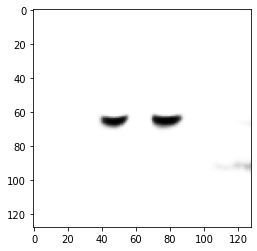

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(pred2[:,:,0], cmap='gray')

699

SyntaxError: ignored